In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('carprice.csv')
df = pd.DataFrame(datos)
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:

df = df.drop(['car_ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

C:\Users\Usurio\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


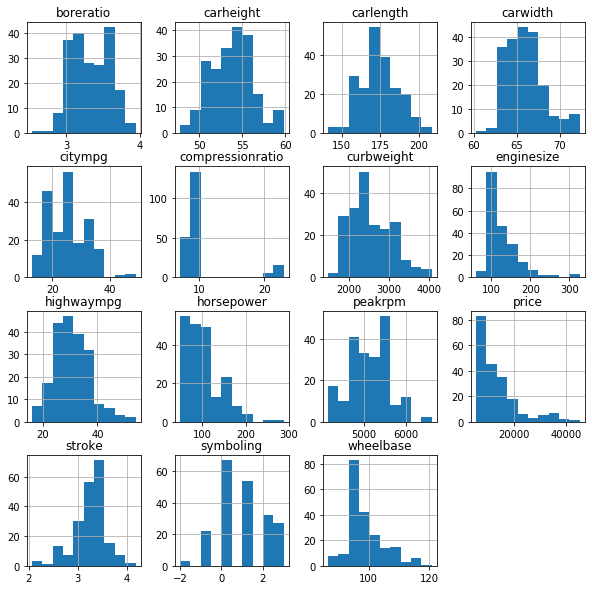

In [4]:
## ANALISIS VISUAL PRELIMINAR DE LOS DATOS
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

1.7776781560914454

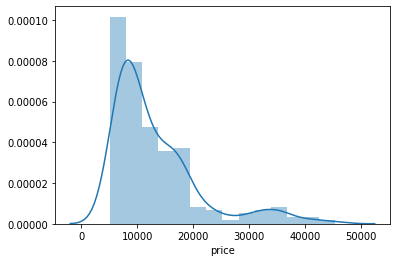

In [5]:
## OBSERVACION DEL TIPO DE DISTRIBUCION QUE SE TIENE PARA LOS PRECIOS
sns.distplot(df['price'])
df['price'].skew()

In [6]:
## VAMOS A UTILIZAR LABEL ENCODER ENTRE LAS OPCIONES QUE TENEMOS 
##--- get_dummies : aumentar dimension y facil acceso
## --- OneHotEncoer : para datos ordinales
## -- Labelencoder : asigna numero entero a el objeto, dificil acceso

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CarName'] = encoder.fit_transform(df['CarName'])
df['fueltype'] = encoder.fit_transform(df['fueltype'])
df['aspiration'] = encoder.fit_transform(df['aspiration'])
df['doornumber'] = encoder.fit_transform(df['doornumber'])
df['carbody'] = encoder.fit_transform(df['carbody'])
df['drivewheel'] = encoder.fit_transform(df['drivewheel'])
df['enginelocation'] = encoder.fit_transform(df['enginelocation'])
df['enginetype'] = encoder.fit_transform(df['enginetype'])
df['cylindernumber'] = encoder.fit_transform(df['cylindernumber'])
df['fuelsystem'] = encoder.fit_transform(df['fuelsystem'])
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


C:\Users\Usurio\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


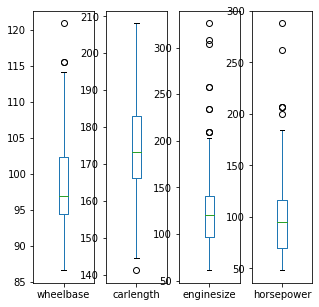

In [7]:
## YA QUE TENEMOS LOS DATOS EN VALORES NUMERICOS VAMOS A OBSERVAR PARA LOS QUE NO FUERON ENCODING SI TIENEN OUTLIERS Y 
## COMO TRATAMOS ESTOS DATOS ANOMALOS
df_out = df.loc[:,['wheelbase','carlength','enginesize','horsepower']]
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
df_out.plot(kind='box', subplots=True, ax = ax)
plt.show()

##OBSERVAMOS QUE LOS enginesize y horsepower POSEEN DATOS ANOMALOS

C:\Users\Usurio\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


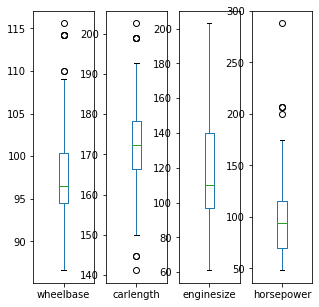

In [8]:
Q1 = df_out['enginesize'].quantile(0.25)
Q3 = df_out['enginesize'].quantile(0.75)
IQR = (Q3-Q1)
BI_calculado = (Q1 - 1.5*IQR)
BS_calculado = (Q3 + 1.5*IQR)
df_out = df_out[(df_out['enginesize']>BI_calculado) & (df_out['enginesize']<BS_calculado)]
df_out
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
df_out.plot(ax = ax , kind='box', subplots=True)
plt.show()

## YA QUE OBSERVAMOS UNA MEJORIA PARA LOS DATOS ANOMALOS DE ENGINESIZE QUE PODIAN AFECTAR EL MODELO
## VAMOS A EFECTUARLO EN df original

In [9]:
Q1 = df['enginesize'].quantile(0.25)
Q3 = df['enginesize'].quantile(0.75)
IQR = (Q3-Q1)
BI_calculado = (Q1 - 1.5*IQR)
BS_calculado = (Q3 + 1.5*IQR)
df = df[(df['enginesize']>BI_calculado) & (df['enginesize']<BS_calculado)]
df

## OBSERVAMOS QUE EL df tenia 205 lineas y ahora tiene 195 donde se evidencia la eliminacion de los outliers

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


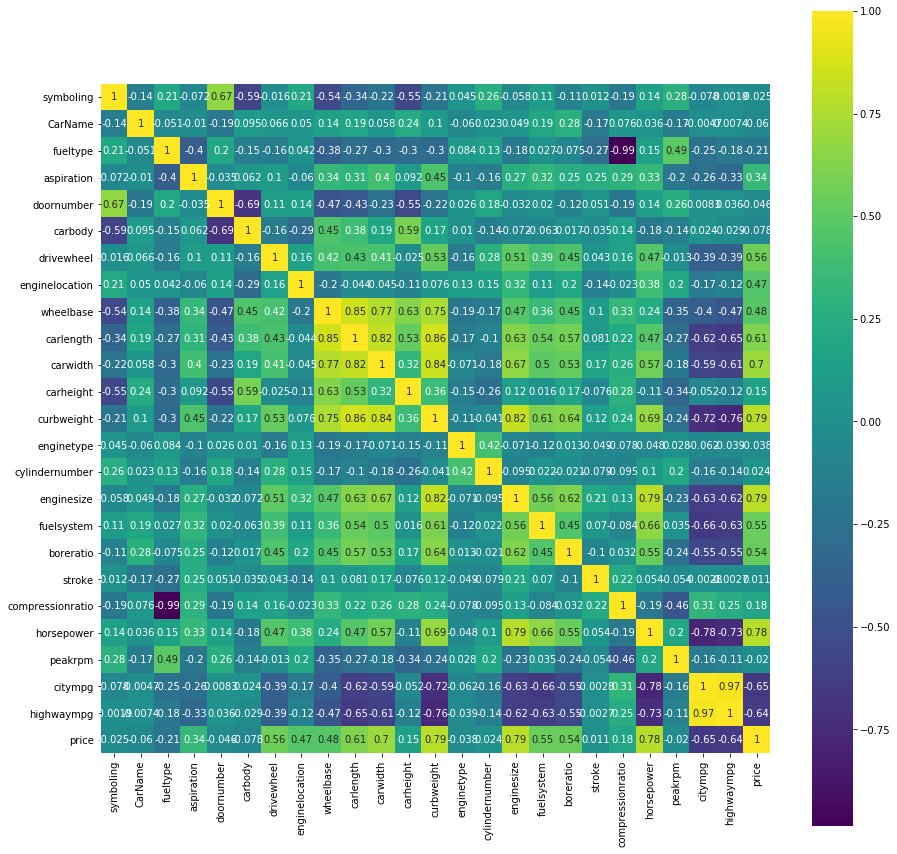

In [10]:
## OBSERVAMOS LA CORRELACION QUE SE PRESENTA PARA LOS DATOS 
correlacion = df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(correlacion, square=True, annot=True, cmap='viridis')
plt.show()

In [11]:
Price_corr = abs(correlacion['price'])
Price_corr 

symboling           0.024634
CarName             0.059712
fueltype            0.212635
aspiration          0.341521
doornumber          0.045798
carbody             0.078176
drivewheel          0.558763
enginelocation      0.468441
wheelbase           0.480129
carlength           0.612517
carwidth            0.699507
carheight           0.148948
curbweight          0.790396
enginetype          0.037702
cylindernumber      0.023543
enginesize          0.793592
fuelsystem          0.549301
boreratio           0.542801
stroke              0.010861
compressionratio    0.184232
horsepower          0.779158
peakrpm             0.019799
citympg             0.651883
highwaympg          0.638090
price               1.000000
Name: price, dtype: float64

In [13]:
Top_correlation = Price_corr[Price_corr>0.65]
Top_correlation

carwidth      0.699507
curbweight    0.790396
enginesize    0.793592
horsepower    0.779158
citympg       0.651883
price         1.000000
Name: price, dtype: float64

In [ ]:
## ESCOGER LAS DE MAYOR RELACION: NICOLAS DEL FUTURO

In [213]:
## CREACION DEL MODELO : SEPARACION DE DATOS 
## ANTES DE ESTO ESTANDARIZAMOS LOS DATOS YA QUE SE ENCUENTRA EN DIFERENTES ESCALAS
df = df.iloc[:,0:25]
Colums = ['wheelbase','carlength','carwidth','carheight','enginesize','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[Colums] = scaler.fit_transform(df[Colums])
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,-1.765628,-0.360919,...,0.332936,5,3.47,2.68,-0.304813,0.309877,-0.282974,-0.758676,-0.677696,0.238011
1,3,3,1,0,1,0,2,0,-1.765628,-0.360919,...,0.332936,5,3.47,2.68,-0.304813,0.309877,-0.282974,-0.758676,-0.677696,0.739419
2,1,1,1,0,1,2,2,0,-0.683969,-0.150623,...,1.091457,5,2.68,3.47,-0.304813,1.524612,-0.282974,-1.078550,-0.832802,0.739419
3,2,4,1,0,0,3,1,0,0.287690,0.322544,...,-0.391107,5,3.19,3.40,-0.057070,0.055630,0.760124,-0.278865,-0.212376,0.313932
4,2,5,1,0,0,3,0,0,0.214357,0.322544,...,0.539805,5,3.19,3.40,-0.552557,0.422876,0.760124,-1.238487,-1.453227,0.897934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,1.992678,1.391551,...,0.712197,5,3.78,3.15,-0.180942,0.394626,0.551505,-0.438802,-0.522589,0.796985
201,-1,138,1,1,0,3,2,0,1.992678,1.391551,...,0.712197,5,3.78,3.15,-0.379136,1.694110,0.342885,-1.078550,-0.987908,1.164072
202,-1,140,1,0,0,3,2,0,1.992678,1.391551,...,1.815500,5,3.58,2.87,-0.354362,0.959619,0.760124,-1.238487,-1.298121,1.571204
203,-1,142,0,1,0,3,2,0,1.992678,1.391551,...,0.850110,3,3.01,3.40,3.163594,0.168629,-0.700213,0.041010,-0.677696,1.735559


In [216]:
X = df.iloc[:,0:24]
Y = df['price']

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.20)
model = LinearRegression()
model.fit(X_train,Y_train)
Y_predic = model.predict(X_test)

In [220]:
model.score(X_test,Y_test)

0.890412821879459

In [221]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Y_predic,Y_test)
print(error)

0.10388393992921642
